# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started! 

Import the file `'turnstile_180901.txt'`. 

In [48]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [51]:
# Rename all the columns to lower case

df.columns = map(str.lower, df.columns)


df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Change the index to `'linename'`: 

In [74]:
# Change the index to 'linename'
# df = df.set_index('linename')
df.head()


AttributeError: 'DataFrame' object has no attribute 'row'

Reset the index: 

In [93]:
# Reset the index
df = df.reset_index()

df.head()

,level_0,index,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,0,0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,1,1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,2,2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,3,3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,4,4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [99]:
# Add a new 'num_lines' column
df = df.set_index('index')
def count_lines(line):
    return len(line)

df['Num_Lines'] = df['linename'].map(count_lines)
df.head()

,level_0,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines,Num Lines
index,,,,,,,,,,,,,,
0,0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7,7
1,1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7,7
2,2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7,7
3,3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7,7
4,4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7,7


Write a function to clean column names: 

In [104]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.strip()
    if "_" in cleaned:
        re_cleaned = cleaned.replace("_"," ")
        return re_cleaned
    else:
        return cleaned

In [110]:
# Use the above function to clean the column names

df.columns = df.columns.map(clean)


In [117]:
# Check to ensure the column names were cleaned
df.columns
df['date'].dtype


,level 0,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num Lines,Num Lines
index,,,,,,,,,,,,,,
0,0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7,7
1,1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7,7
2,2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7,7
3,3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7,7
4,4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7,7


- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [127]:
# Convert the data type of the 'date' column to a date
df['date']=pd.to_datetime(df['date'])
df.head()
# Add a new column 'day_of_week' that represents the day of the week 
df['day of week']= df['date'].dt.day_name()
df.head()

,level 0,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num Lines,Num Lines,day of week
index,,,,,,,,,,,,,,,
0,0,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,7,Saturday
1,1,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,7,Saturday
2,2,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,7,7,Saturday
3,3,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,7,7,Saturday
4,4,NQR456W,A002,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,7,7,Saturday


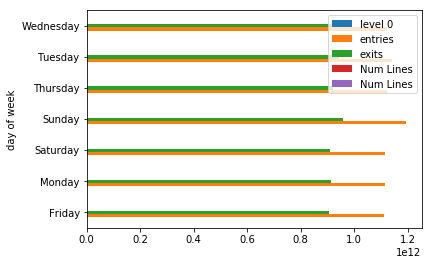

In [147]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day of week').sum()
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [149]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
grouped.head()

,index,day of week,level 0,entries,exits,Num Lines,Num Lines
0,0,Friday,2778112001,1110224700078,906799065337,75573,75573
1,1,Monday,2783610827,1114237052454,911938153513,76110,76110
2,2,Saturday,2741377942,1115661545514,909142081474,74725,74725
3,3,Sunday,2792287000,1192306179082,959223750461,75306,75306
4,4,Thursday,2817391725,1122723988662,920691927110,76607,76607


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [171]:
# Use this dictionary to create a new column 
weekend_map = {'Monday':False, 'Tuesday':False, 'Wednesday':False, 'Thursday':False, 'Friday':False, 'Saturday':True, 'Sunday':True}

In [172]:
# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day of week'].map(weekend_map)

In [173]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum()

In [174]:
wkend

,index,level 0,entries,exits,Num Lines,Num Lines
is_weekend,,,,,,
False,16,13994056558,5614154250681,4602290732124,381306,381306
True,5,5533664942,2307967724596,1868365831935,150031,150031


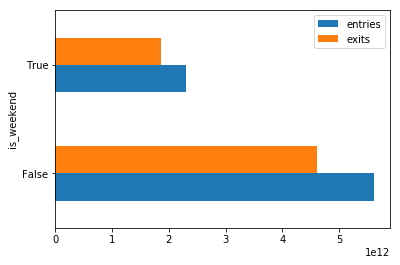

In [175]:
wkend[['entries', 'exits']].plot(kind='barh')

In [176]:
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [178]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(['c/a', 'scp'], axis=1)
df.head(2)

,level 0,linename,unit,station,division,date,time,desc,entries,exits,Num Lines,Num Lines,day of week
index,,,,,,,,,,,,,
0,0,NQR456W,R051,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,7,Saturday
1,1,NQR456W,R051,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,7,Saturday


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 

## Summary

Great! You practiced your data cleanup skills using Pandas.